References:

*   https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
*   https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705
*   https://machinelearningmastery.com/time-series-data-visualization-with-python/ 

Plots:
*   Line plot
*   Density and Histogramm
*   Decomposition
*   Lag Scatter Plot
*   Autocorrelation plot
*   Box Plot


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install statsmodels==0.12.2

In [3]:
import pandas as pd
# plotting
import seaborn as sns 
import matplotlib.pyplot as plt
# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (26, 10)


#DATA_PATH = '/content/drive/My Drive/my_colab/'
DATA_PATH = './Data/'
AMZN_DATA = f'{DATA_PATH}AMZN/AMZN.csv'

amzn_df = pd.read_csv(AMZN_DATA, parse_dates=['Date'])

amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


Line plot

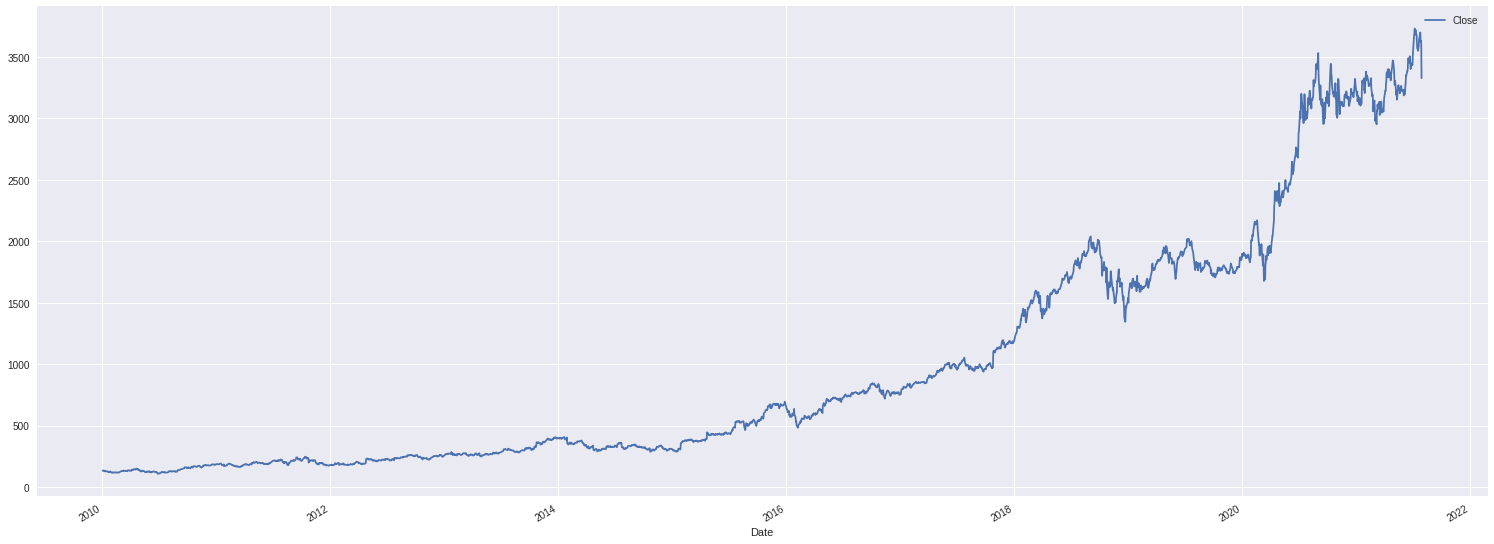

In [4]:
import plotly.express as px

def plot_ts_window(df, dt_col, series_col, start=None, end=None):   
    df = df[[dt_col, series_col]]
    start = str(df[dt_col].min()) if start is None else start
    end = str(df[dt_col].max()) if end is None else end
    win_df = df[(df[dt_col] >= start) & (df[dt_col] <= end)]
    win_df.set_index(dt_col).plot(figsize=(26,10), grid=True)

plot_ts_window(amzn_df, 'Date', 'Close')

Histogram and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8963175a90>]],
      dtype=object)

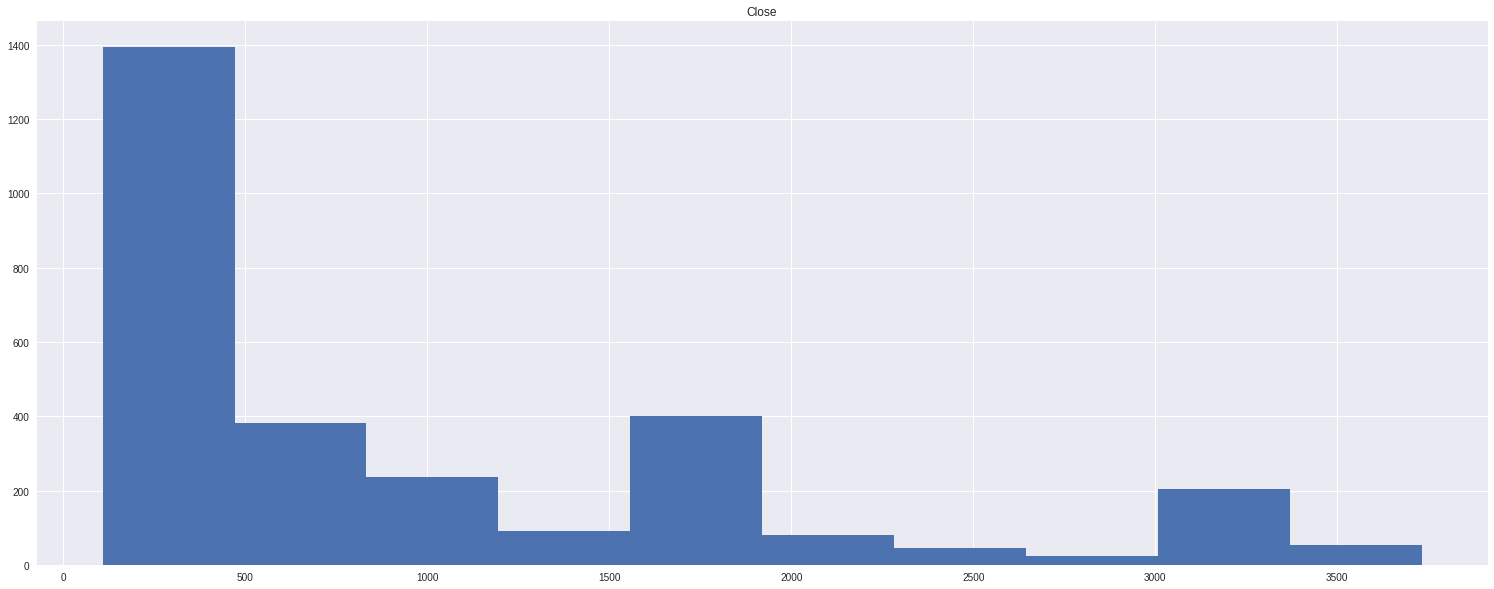

In [5]:
amzn_df.hist(column=["Close"])

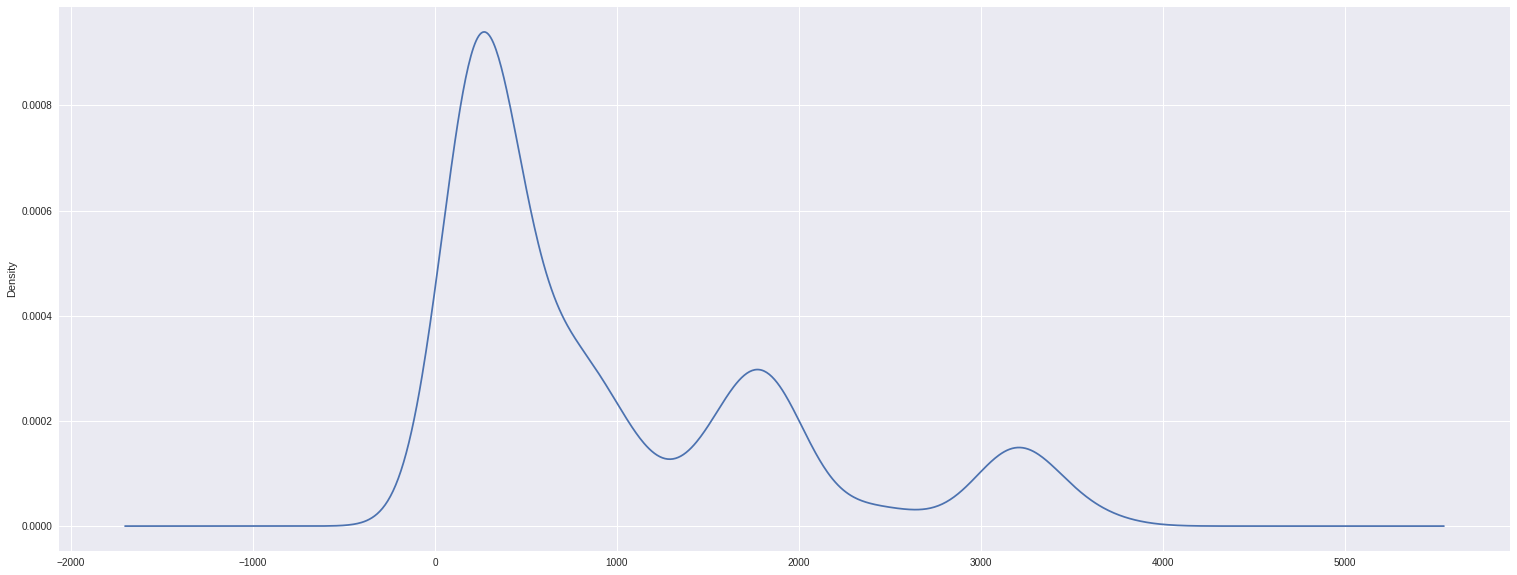

In [6]:
amzn_df['Close'].plot(kind='kde')

Decomposition

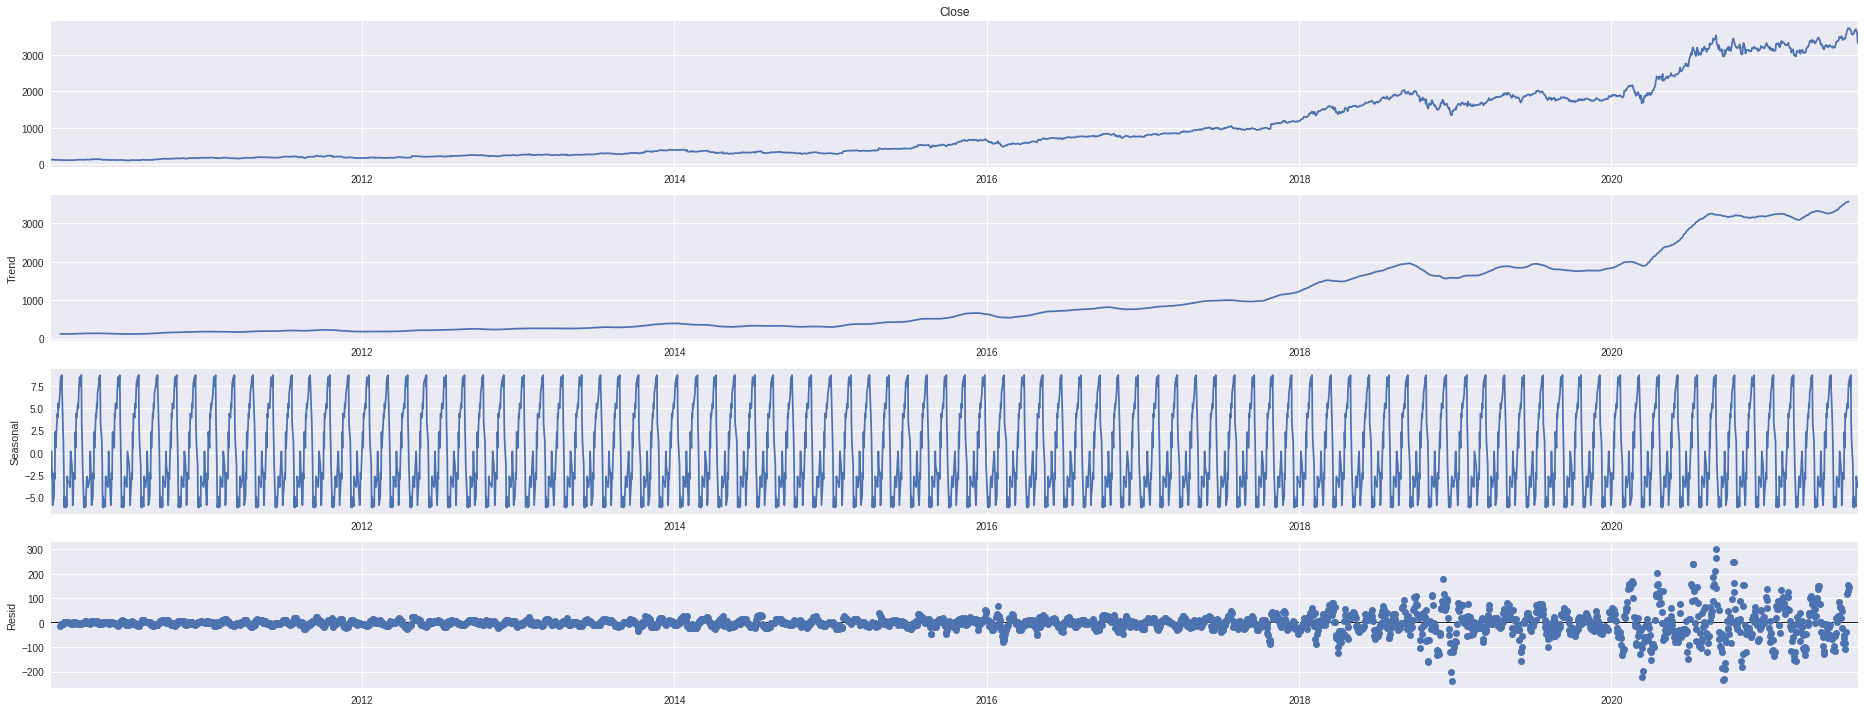

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

date_indexed_amzn_df = amzn_df.copy()
date_indexed_amzn_df.set_index("Date", inplace=True)

decomposition = seasonal_decompose(date_indexed_amzn_df['Close'], model='additive', period=31)
decomposition.plot()

# fig, axes = plt.subplots(4, 1,figsize=(26, 10), sharex=True)
# decomposition.observed.plot(ax=axes[0], legend=False,linewidth=1.5, color='#3498db')
# axes[0].set_ylabel('Observed')
# decomposition.trend.plot(ax=axes[1], legend=False, linewidth=1.5, color='#3498db')
# axes[1].set_ylabel('Trend')
# decomposition.seasonal.plot(ax=axes[2], legend=False, linewidth=1.5, color = '#3498db')
# axes[2].set_ylabel('Seasonal')
# decomposition.resid.plot(ax=axes[3], legend=False, linewidth=1.5, color='#3498db')
# axes[3].set_ylabel('Residual')

del date_indexed_amzn_df

Lag scatter plot

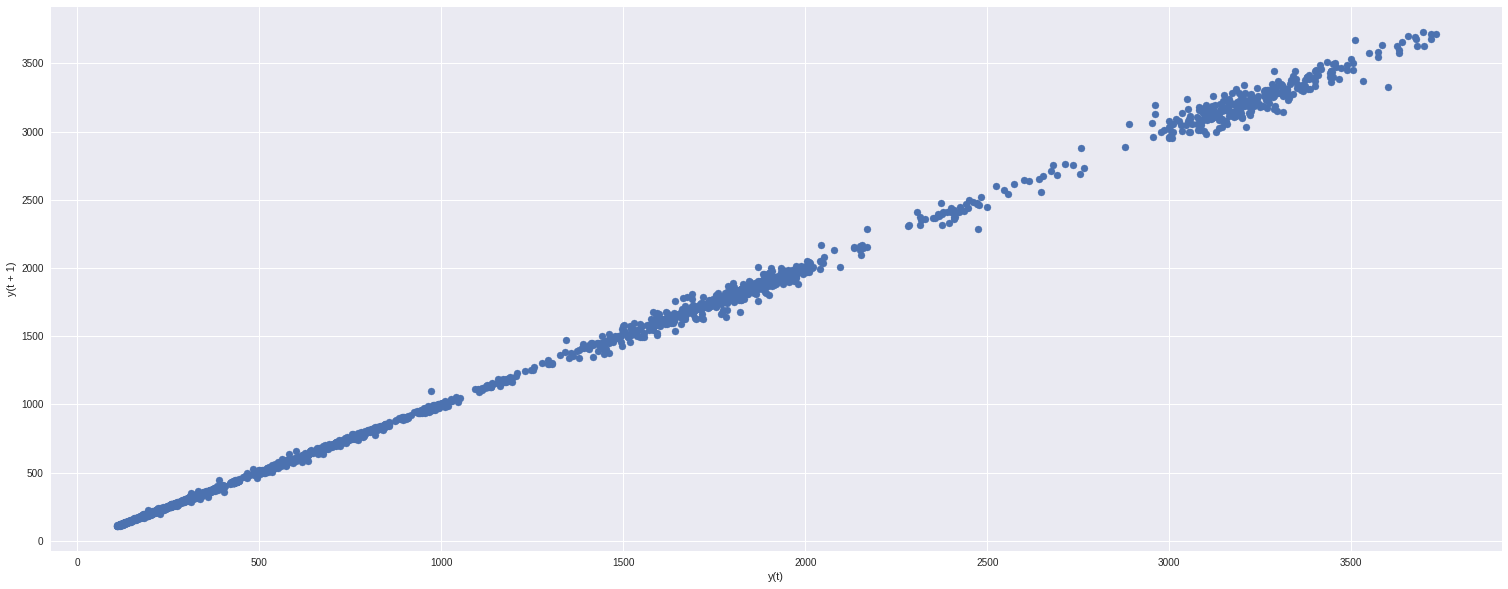

In [8]:
pd.plotting.lag_plot(amzn_df['Close'], lag=1)

Autocorrelation plots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



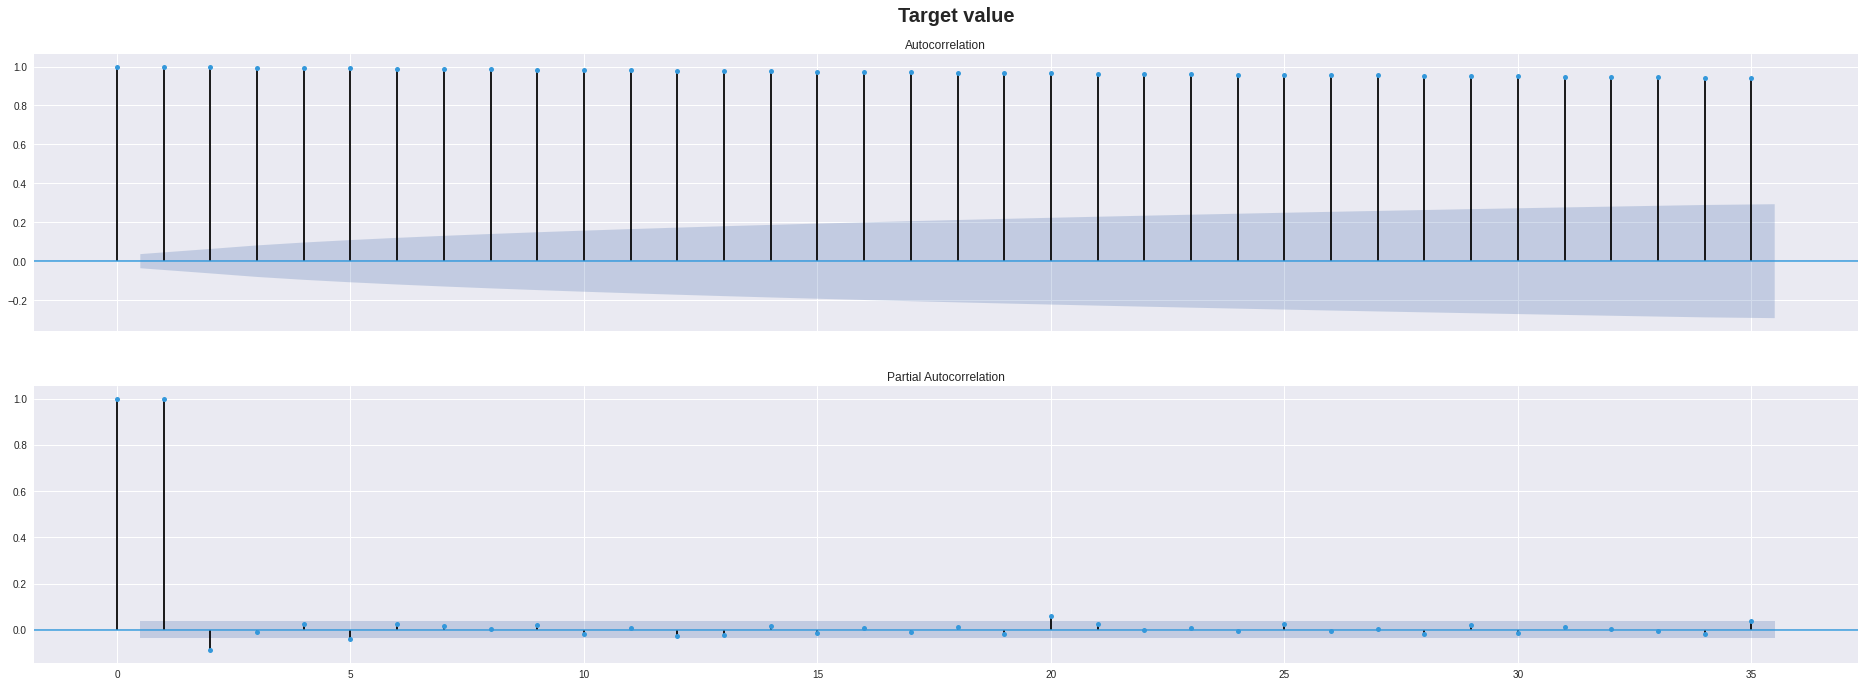

In [9]:
fig, ax = plt.subplots(2, constrained_layout=True, sharex=True)
mid = (fig.subplotpars.right + fig.subplotpars.left) / 2
plt.suptitle(f'Target value', fontsize=20, weight='bold', x=mid)

plot_acf(amzn_df['Close'], ax=ax[0], linewidth=1.5, color='#3498db')
plot_pacf(amzn_df['Close'], ax=ax[1],linewidth=1.5, color='#3498db');

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)
# plt.savefig(f'11. Autocorrelation.png', bbox_inches='tight', dpi=200)
# plt.close(fig)
# plt.close('all')

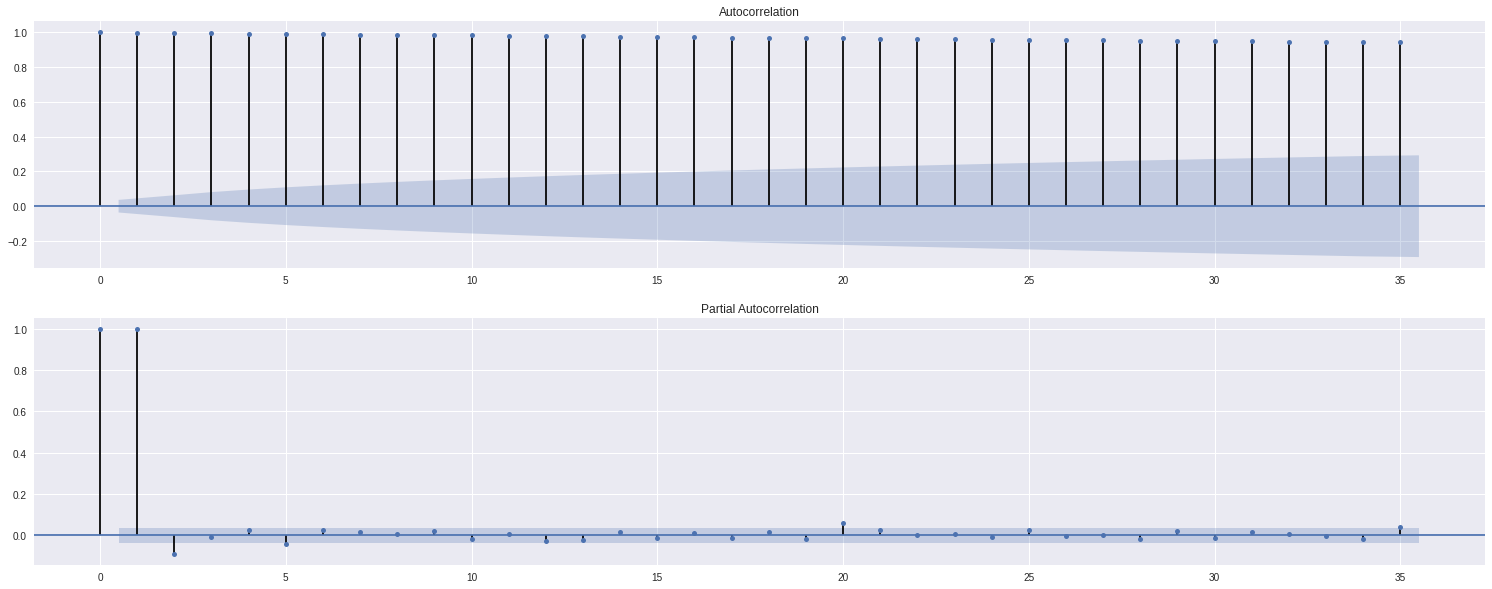

In [10]:
fig, ax = plt.subplots(2)
plot_acf(amzn_df['Close'], ax=ax[0])
plot_pacf(amzn_df['Close'], ax=ax[1]);

Box Plots

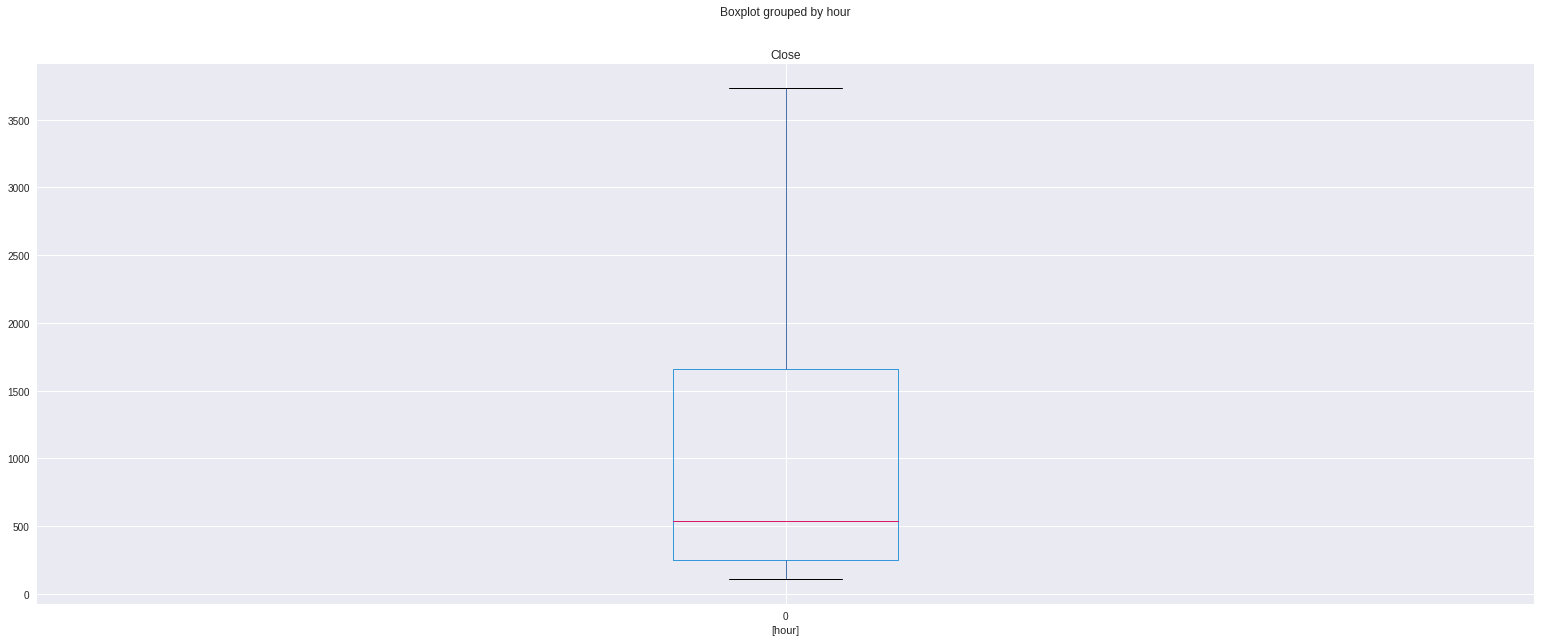

In [11]:
amzn_df["year"] = amzn_df["Date"].dt.year
amzn_df["month"] = amzn_df["Date"].dt.month
amzn_df["dayofweek"] = amzn_df["Date"].dt.dayofweek
amzn_df["hour"] = amzn_df["Date"].dt.hour
amzn_df["day"] = amzn_df["Date"].dt.day

boxprops = dict(linestyle='-', color='#3498db')
medianprops = dict(linestyle='-', color='#d81c63')
amzn_df.boxplot(column=["Close"], by=["hour"], boxprops=boxprops, medianprops=medianprops)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



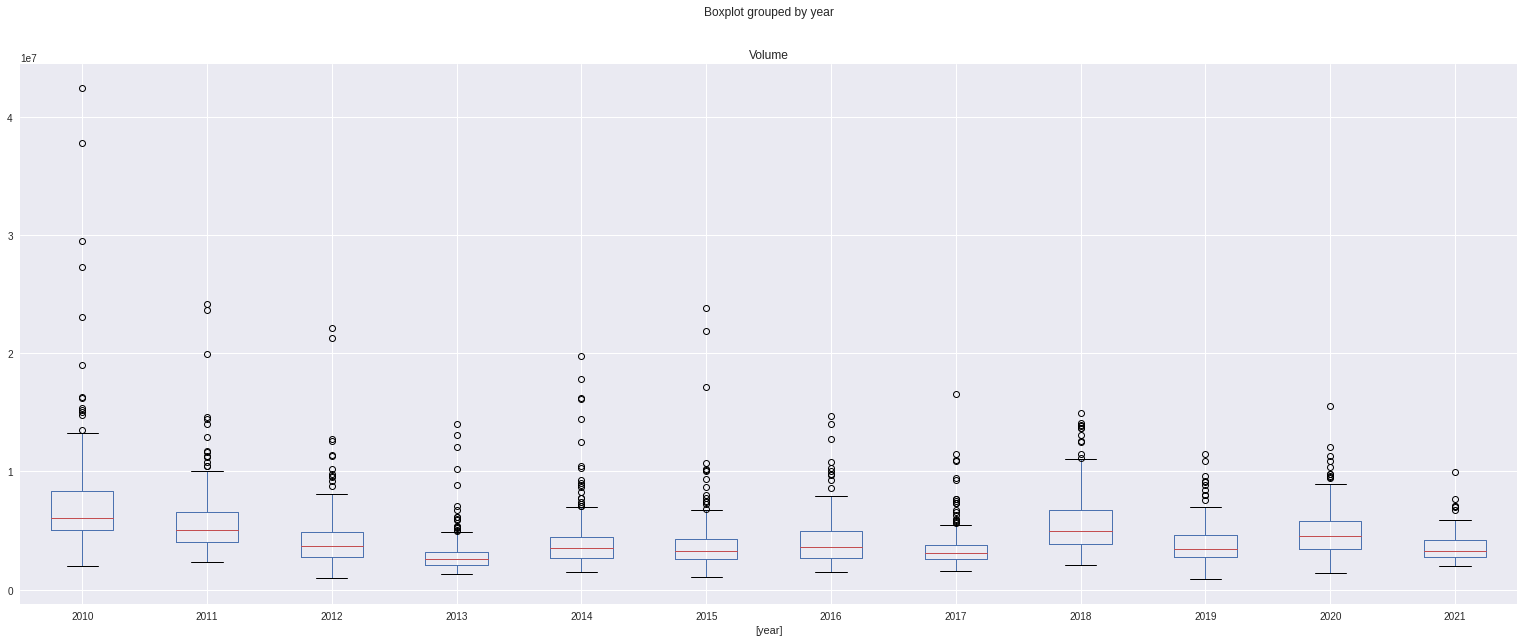

In [12]:
amzn_df.boxplot(column=["Volume"], by=["year"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



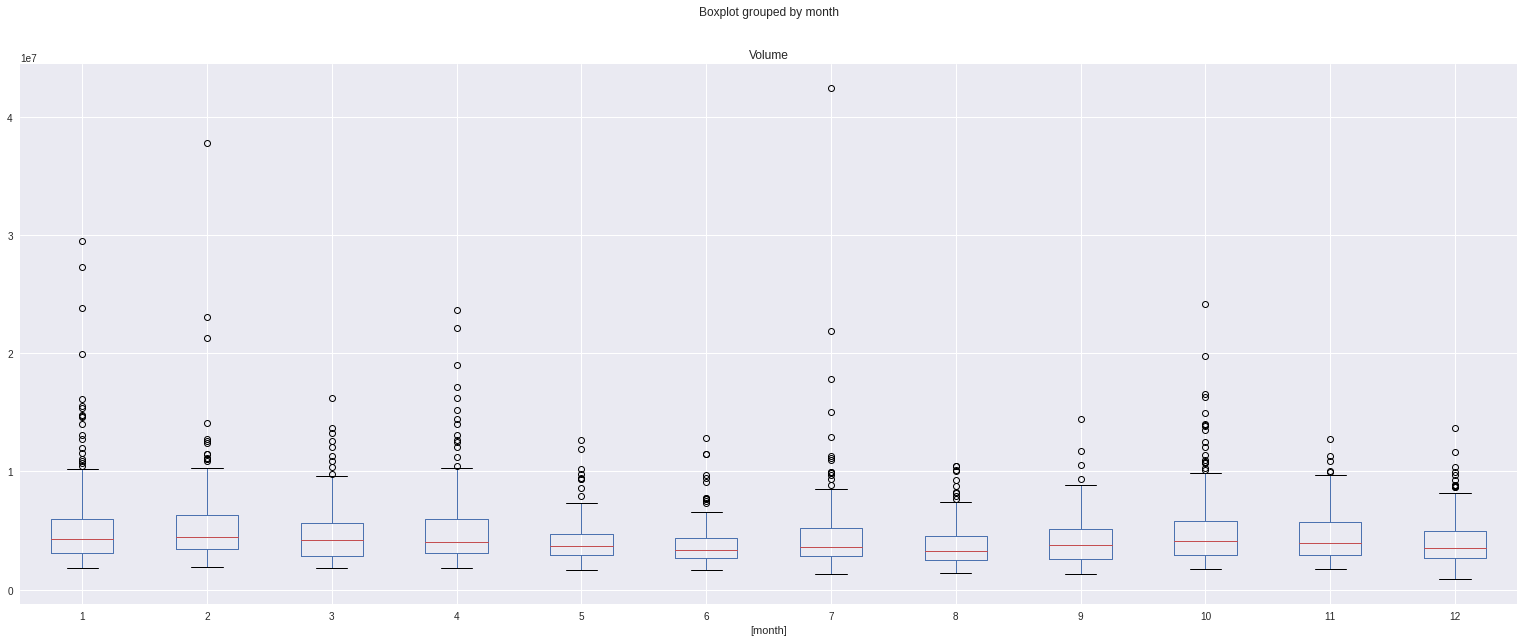

In [13]:
amzn_df.boxplot(column=["Volume"], by=["month"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



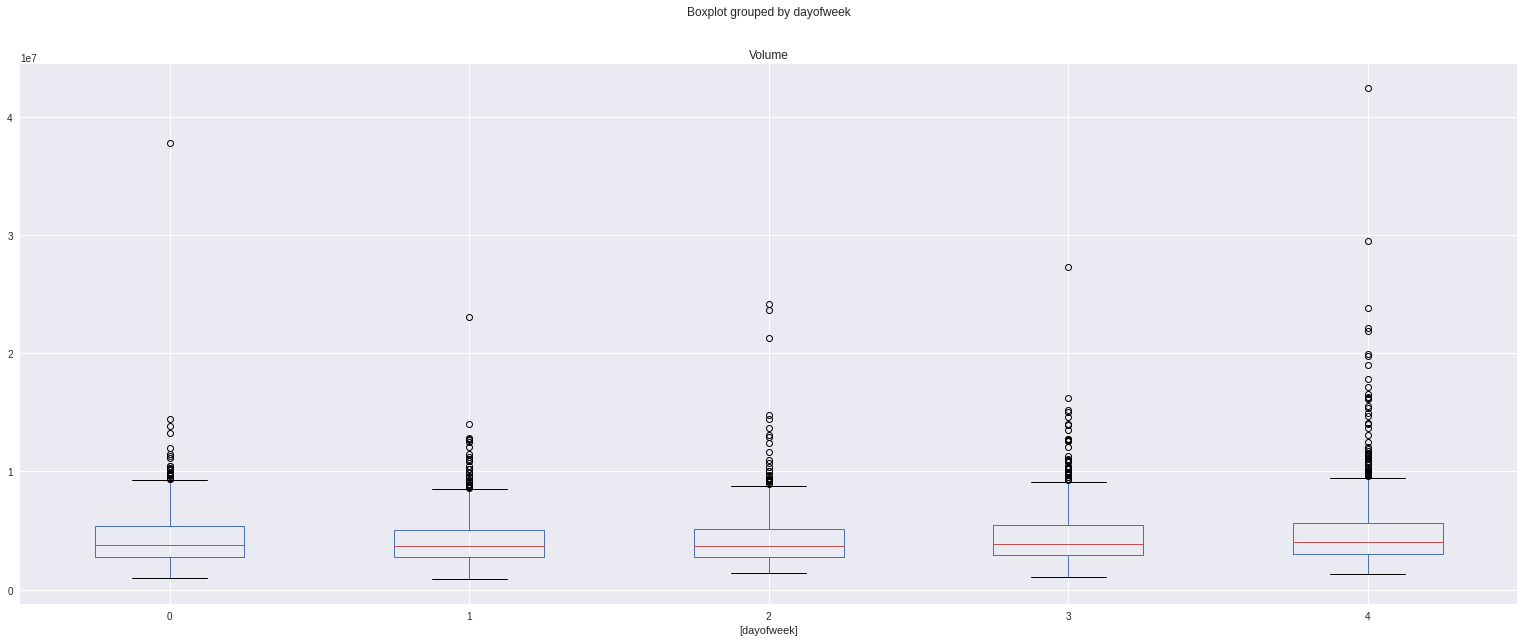

In [14]:
amzn_df.boxplot(column=["Volume"], by=["dayofweek"])